<a href="https://www.kaggle.com/code/eavprog/abscur-tovar-sharp?scriptVersionId=116329473" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный)

На Московской бирже есть множество различных товаров, в которые можно вложиться. Чтобы помочь инвесторам определить самые выгодные варианты для их инвестиций, мы предлагаем ранжирование товаров Московской биржи по коэффициенту Шарпа.

Ранжирование производится для долларовых и абсолютных курсов товаров, и делается для разных временных прромежутков - от месяца до 5 лет. Это позволяет выявить самые выгодные для вложения товары в зависимости от желаемого горизонта инвестиций.

Коэффициент Шарпа является метрикой, которая оценивает доходность инвестиций с учетом риска. Он рассчитывается как соотношение прибыли инвестиций к стандартному отклонению доходности. Чем выше коэффициент Шарпа, тем выше доходность инвестиций по сравнению с риском.

Рейтинги обновляются не реже чем раз в два дня, что позволяет инвесторам отслеживать изменения в доходности и риске различных товаров и сделать информированные инвестиционные решения.

# Оглавление проекта "Абсолютный валютный курс" 

## Представительства проекта:
[**БЛОГ**](http://www.abscur.ru) - 
[**VK**](https://vk.com/abscur) - 
[**WhatsApp**](https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs) - 
[**Viber**](https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc) - 
[**Telegram**](https://t.me/AbsCur) - 
[**ОК**](https://ok.ru/group/53547043520717) - 
[**GitHub**](https://github.com/prog815/abscur) - 
[**YouTube**](https://www.youtube.com/playlist?list=PLG1V24vhSKo6MamGtgm2oTkDZHeHBHNFW) - 
[**Smart-Lab**](https://smart-lab.ru/my/eavpred/) - 
[**VC.ru**](https://vc.ru/u/262921-aleksey-enin)

## Абсолютные валютные курсы:
- [Источник данных с абсолютными курсами](https://www.kaggle.com/code/eavprog/abscur-data) 
- [Последние абсолютные курсы](https://www.kaggle.com/code/eavprog/abscur-posled-kurs)
- [Графики истории абсолютных валютных курсов](https://www.kaggle.com/eavprog/abscur-hist)
- [Стоимость Абса](https://www.kaggle.com/eavprog/abscur-stoimost-absa)
- [Связь валют на графах через корреляцию](https://www.kaggle.com/code/eavprog/abscur-svyas-valut)
- [Рейтинг абсолютной доходности](https://www.kaggle.com/eavprog/abscur-reyting-dohod)
- [Рейтинг валют по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-sharp)
- [Рейтинг абсолютной стабильности валют](https://www.kaggle.com/eavprog/abscur-reit-stabil)

## Голубые фишки Московской биржи
- [Абсолютные курсы голубых фишек Московской биржи](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki)
- [Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp)
- [Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-bluefish-sharp-rub)

## Товары Московской биржи
- [Абсолютные курсы товаров Мосбиржи](https://www.kaggle.com/eavprog/mmvb-abscur-tovar)
- [Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный)](https://www.kaggle.com/eavprog/abscur-tovar-sharp)

---



# За месяц (абсолютные курсы)

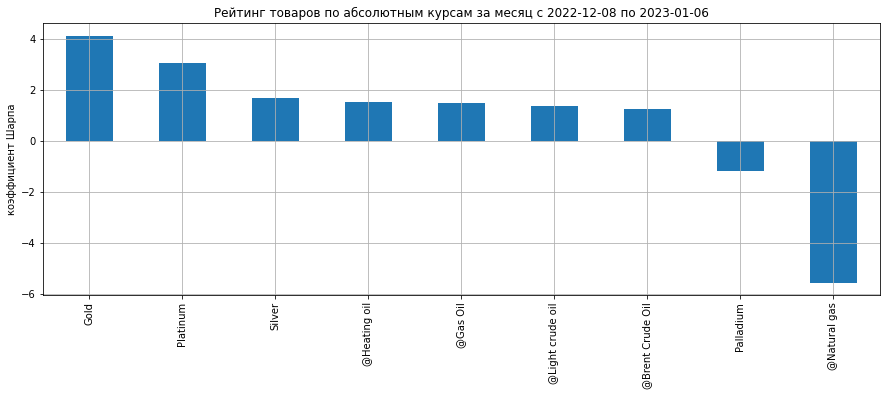

# За месяц (доллоровые курсы)

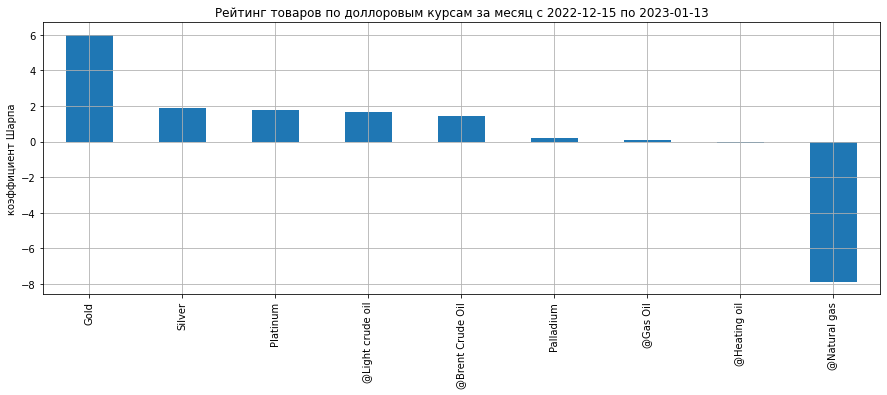

--- 


# За квартал (абсолютные курсы)

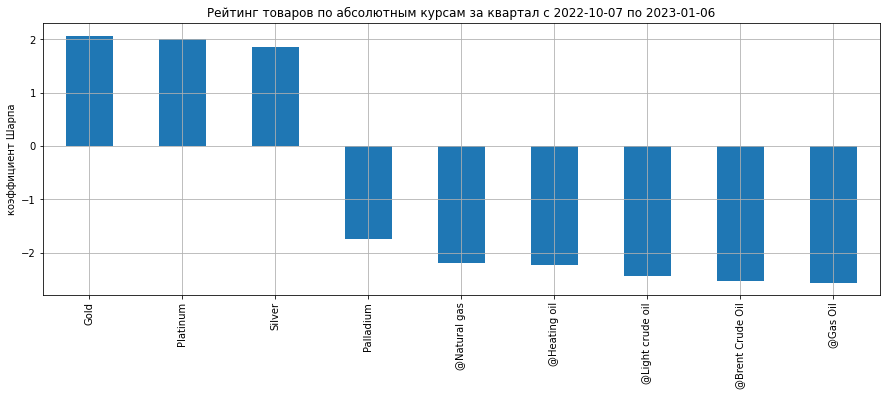

# За квартал (доллоровые курсы)

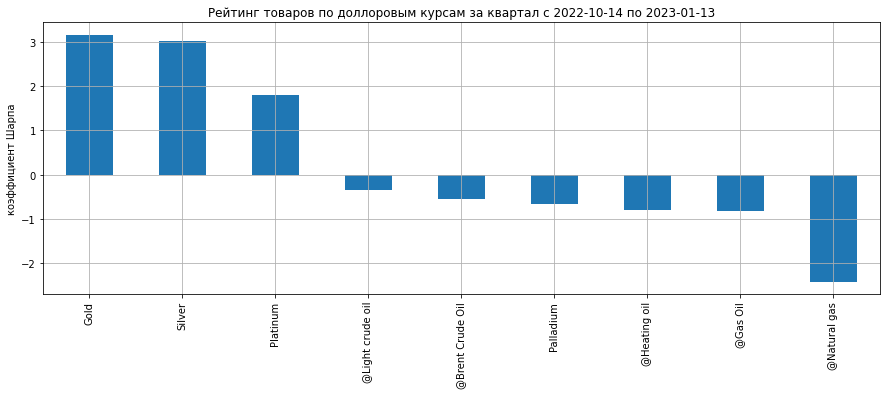

--- 


# За полгода (абсолютные курсы)

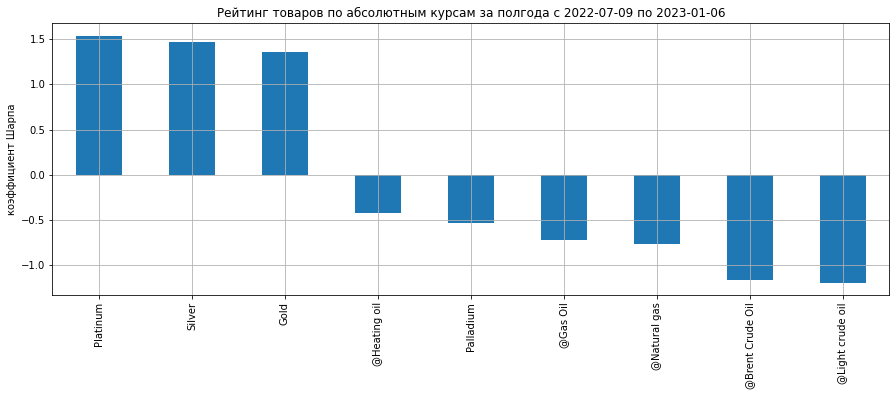

# За полгода (доллоровые курсы)

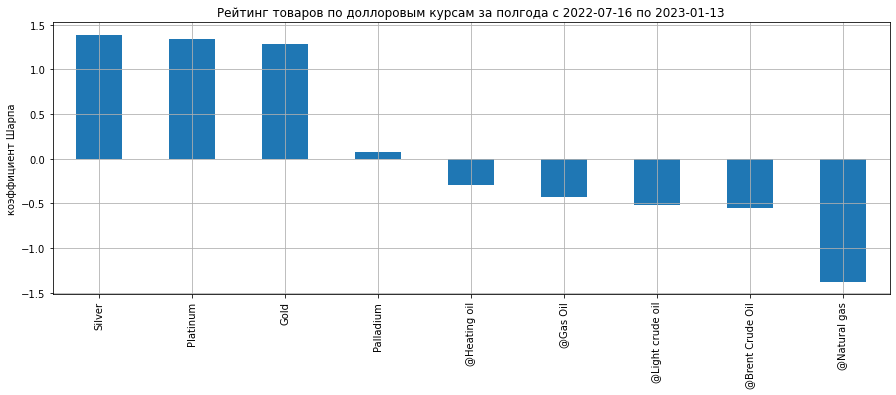

--- 


# За год (абсолютные курсы)

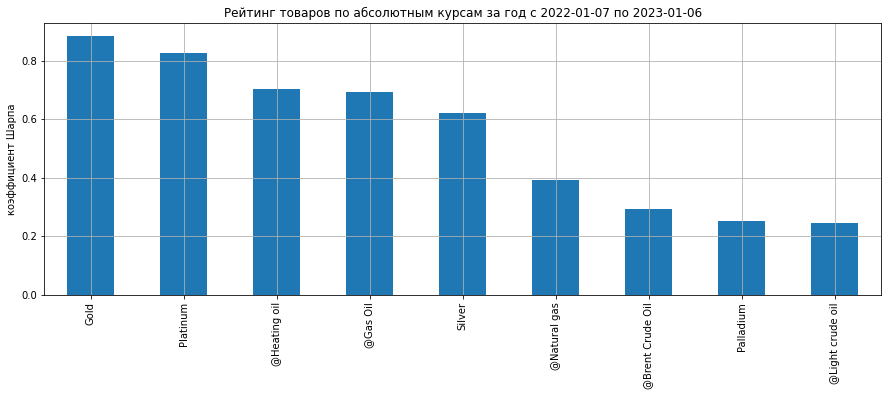

# За год (доллоровые курсы)

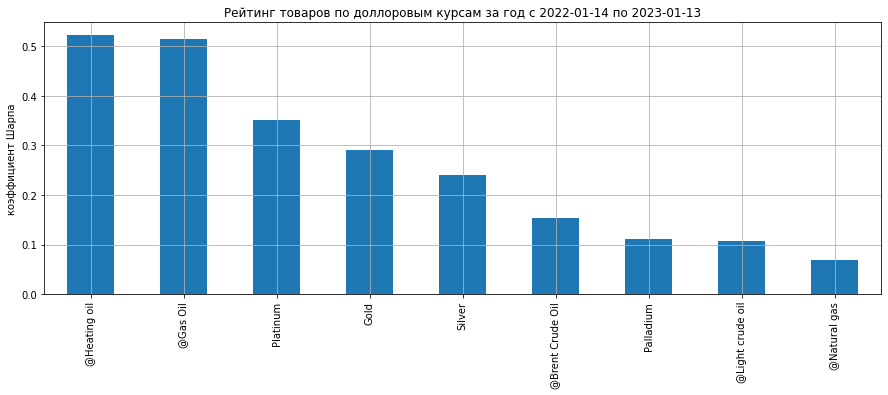

--- 


# За 2 года (абсолютные курсы)

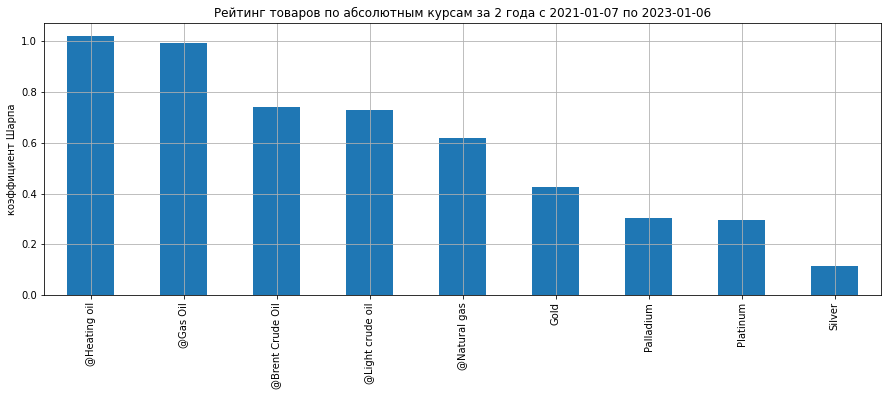

# За 2 года (доллоровые курсы)

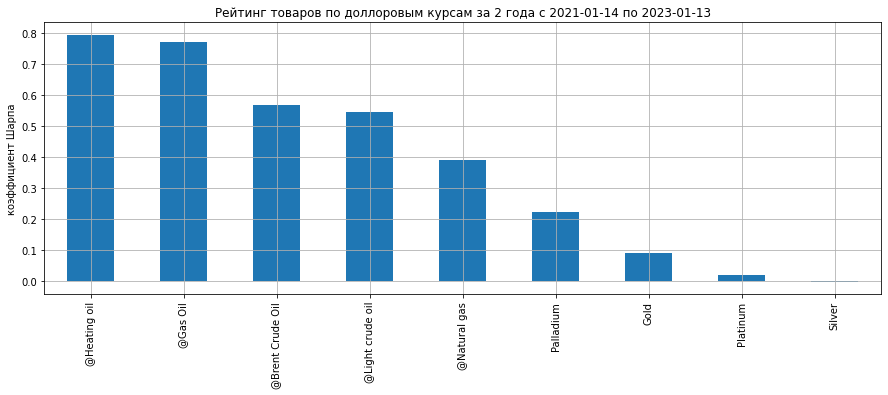

--- 


# За 3 года (абсолютные курсы)

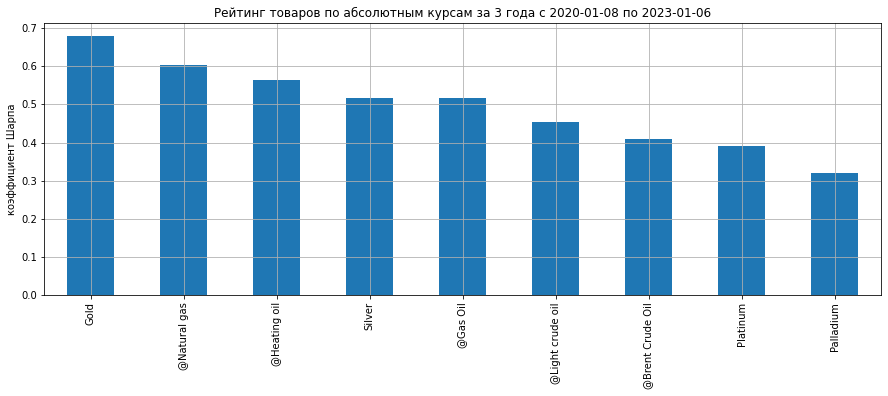

# За 3 года (доллоровые курсы)

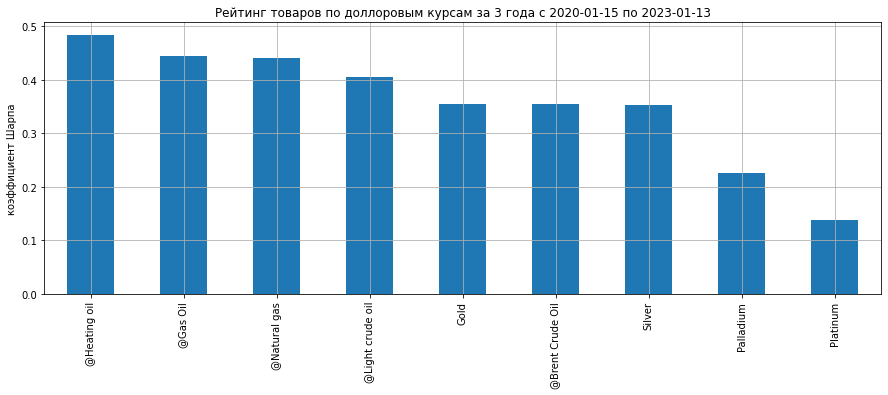

--- 


# За 5 лет (абсолютные курсы)

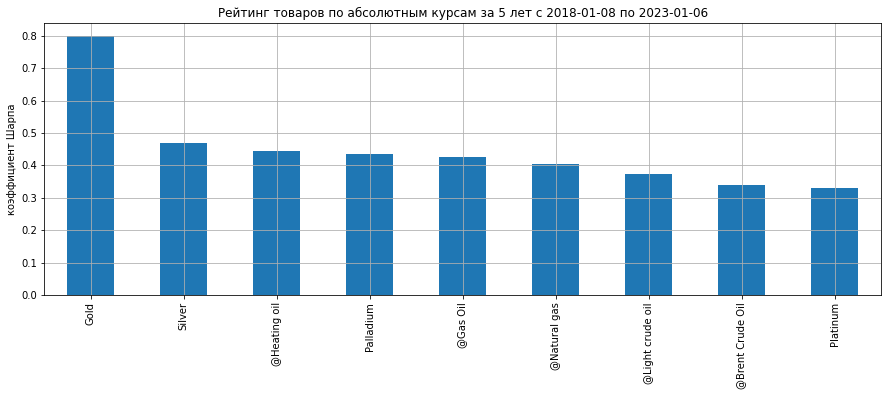

# За 5 лет (доллоровые курсы)

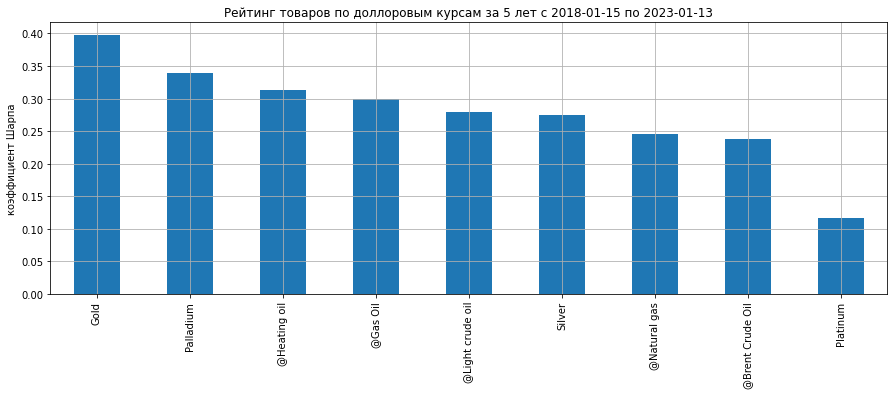

--- 


In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import abscur_menu

# меню проекта печатаем
abscur_menu.print_menu()

# абсолютные курсы товаров подкачиваем
tov_abs = pd.read_csv("/kaggle/input/mmvb-abscur-tovar/tov_abscur.csv",index_col=0,parse_dates=['Date'])
tov_close = pd.read_csv("/kaggle/input/mmvb-tovar/close_table.csv",index_col=0,parse_dates=['Dates'])

# расчет коэффициента Шарпа
def sharpe_ratio(return_series, N=255, rf=0.01):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

diap = [[30,"месяц"],[92,"квартал"],[182,"полгода"],[365,"год"],[2*365,"2 года"],[3*365,"3 года"],[5*365,"5 лет"]]

for per,title_per in diap:
    display(Markdown("# За " + title_per + " (абсолютные курсы)"))
    
    date_start = tov_abs.asfreq(freq="D").index[-per]
    date_finish = tov_abs.index[-1]
    
    res = sharpe_ratio(tov_abs[tov_abs.index >= date_start].pct_change())
    res.sort_values(ascending=False,inplace=True)
    res.plot.bar(grid=True,title="Рейтинг товаров по абсолютным курсам за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по "+datetime.datetime.strftime(date_finish,"%Y-%m-%d"),ylabel="коэффициент Шарпа",legend=False,figsize=(15,5))
    plt.show()
    
    display(Markdown("# За " + title_per + " (доллоровые курсы)"))
    
    date_start = tov_close.asfreq(freq="D").index[-per]
    date_finish = tov_close.index[-1]
    
    res = sharpe_ratio(tov_close[tov_close.index >= date_start].pct_change())
    res.sort_values(ascending=False,inplace=True)
    res.plot.bar(grid=True,title="Рейтинг товаров по доллоровым курсам за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по "+datetime.datetime.strftime(date_finish,"%Y-%m-%d"),ylabel="коэффициент Шарпа",legend=False,figsize=(15,5))
    plt.show()
    
    display(Markdown("--- \n"))